# Линейная регрессия

### Подключаем необходимые пакеты

In [4]:
import time
import numpy as np
import pandas as pd
from tabulate import tabulate
import random
import utils

### Импортируем входные данные
Входные комнаты и цены.

In [6]:
features = np.array([1, 2, 3, 5, 6, 7]) 
labels = np.array([155, 197, 244, 356, 407, 448])

# Выводим данные для проверки
print("Количество комнат:", features)
print("Цены:", labels)

Количество комнат: [1 2 3 5 6 7]
Цены: [155 197 244 356 407 448]


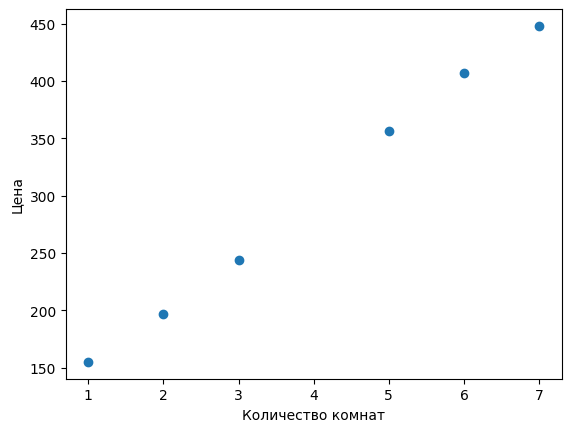

In [7]:
# Визуализируем входные значения
utils.plot_points(features, labels)

## Обновляем параметры ценообразования
### Функция для градиентного обновления коэффициентов (метод квадратичной ошибки)
Обновляет параметры модели линейной регрессии с использованием квадратичной ошибки.
- base_price: начальная базовая цена
- price_per_room: начальная цена за одну комнату
- num_rooms: количество комнат в текущем примере
- price: реальная цена жилья
- learning_rate: скорость обучения

In [8]:
# Функция для градиентного обновления коэффициентов (метод квадратичной ошибки)
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    base_price += learning_rate * (price - predicted_price)
    return price_per_room, base_price

### Запуск алгоритма линейной регрессии
#### Это основная функция для обучения линейной регрессии методом стохастического градиентного спуска.
- features: массив признаков (количество комнат)
- labels: массив значений (цены жилья)
- learning_rate: скорость обучения
- epochs: количество итераций

Обученная цена за комнату: 49.8439
Обученная базовая цена: 99.7771


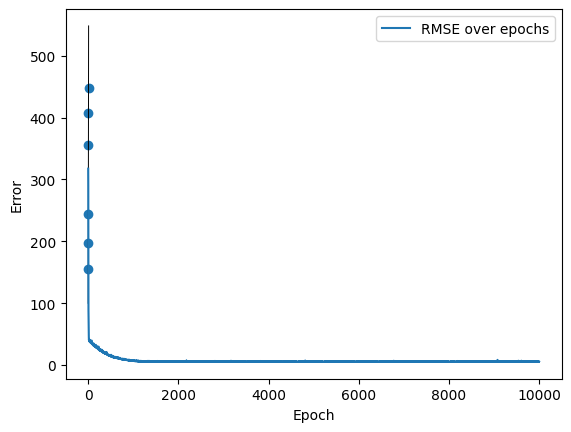

+-----------+--------------+----------+----------------+------------+
| Iteration | Elapsed Time |   RMSE   | Price per room | Base price |
+-----------+--------------+----------+----------------+------------+
|    1.0    |    0.0003    | 317.4786 |     4.4481     |   2.359    |
|  1001.0   |    0.0533    |  6.8458  |    52.0756     |  90.6206   |
|  2001.0   |    0.0867    |  4.979   |    50.7133     |  98.3792   |
|  3001.0   |    0.1127    |  5.5219  |     50.25      |  100.1856  |
|  4001.0   |    0.1451    |  5.3057  |    50.3595     |  100.0271  |
|  5001.0   |    0.1694    |  4.9424  |    50.4039     |  99.8383   |
|  6001.0   |    0.1909    |  5.483   |    50.6173     |   99.741   |
|  7001.0   |    0.2129    |  4.9457  |    50.0148     |   99.979   |
|  8001.0   |    0.2359    |  5.1081  |    50.5516     |  98.9985   |
|  9001.0   |    0.2612    |  5.135   |    50.6336     |  100.1752  |
|  10000.0  |    0.2952    |  5.5998  |    49.8439     |  99.7771   |
+-----------+-------

In [21]:
# Вычисляет корень из средней квадратичной ошибки (RMSE).
def rmse(labels, predictions):
    differences = labels - predictions
    return np.sqrt(np.mean(differences ** 2))


#Обучает линейную регрессию с выводом таблицы итераций.
def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    """
    Обучает линейную регрессию с выводом таблицы итераций.
    """
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    start_time = time.time()
    
    history = []  # Для хранения данных об итерациях
    
    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        
        # Предсказание и ошибка
        predicted_prices = features * price_per_room + base_price
        error = rmse(labels, predicted_prices)
        errors.append(error)
        
        # Обновление коэффициентов
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)
        
        # Сохранение информации для вывода
        if epoch % (epochs // 10) == 0 or epoch == epochs - 1:
            elapsed_time = time.time() - start_time
            history.append([epoch + 1, round(elapsed_time, 4), round(error, 4), round(price_per_room, 4), round(base_price, 4)])
    
    print(f'Обученная цена за комнату: {price_per_room:.4f}')
    print(f'Обученная базовая цена: {base_price:.4f}')

    # Финальная отрисовка линии регрессии
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    
    # График изменения ошибки
    plt.plot(errors, label='RMSE over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

    # Вывод таблицы итераций
    df_history = pd.DataFrame(history, columns=['Iteration', 'Elapsed Time', 'RMSE', 'Price per room', 'Base price'])
    print(tabulate(df_history, headers='keys', tablefmt='pretty', showindex=False))
    
    return price_per_room, base_price

# Вызов обучения
price_per_room, base_price = linear_regression(features, labels, learning_rate=0.01, epochs=10000)



### Функция предсказания на новых данных

####     Возвращает предсказанную цену для заданного количества комнат:
- num_rooms: количество комнат
- price_per_room: обученный коэффициент
- base_price: обученная базовая цена

In [25]:
# Функция предсказания на новых данных
def predict_price(num_rooms, price_per_room, base_price):
    return base_price + price_per_room * num_rooms

# Пример предсказания для 4-комнатной квартиры
new_feature = 4
predicted_price = predict_price(new_feature, price_per_room, base_price)
print(f'Предсказанная цена для {new_feature} комнат: {predicted_price:.2f}')

Предсказанная цена для 4 комнат: 299.15
